
# 靈魂拷問


* 我們來看一個模型的預測，他的預測結果直接就是答案嗎?
* 如果並不是答案只是機率，預測出一張圖片是貓的機率，那要多高才算是貓貓，$0.5$ 夠嗎?
* 如果只是機率那之前提到的準確率、精確率、召回率，又要怎麼算?



### 多提一點，並不是每種模型都有 probability 或 decision

* [SGD](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html?highlight=sgdclassifier#sklearn.linear_model.SGDClassifier)
* [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)
* [Decision Tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decisiontreeclassifier#sklearn.tree.DecisionTreeClassifier)



In [55]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split


X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=87)

classifier = SVC(probability=True).fit(X_train, y_train)

# 直接給信心最高的答案
y_pred = classifier.predict(X_test)
print('Predict: ', y_pred)

# 給所有類別的機率
y_pred_proba = classifier.predict_proba(X_test)
print('Predict Probability: ', y_pred_proba)

# 給所有類別的信心
# The confidence score for a sample is proportional to the signed distance of that sample to the hyperplane.
y_pred_decision = classifier.decision_function(X_test)
print('Confidence Score: ', y_pred_decision)





Predict:  [0 2 2 2 2 1 0 1 1 1 0 0 0 2 0]
Predict Probability:  [[0.97020746 0.01977189 0.01002065]
 [0.00936089 0.00294594 0.98769318]
 [0.00826506 0.03174863 0.95998631]
 [0.01315057 0.00173241 0.98511702]
 [0.0067     0.00321149 0.99008851]
 [0.01107267 0.89004386 0.09888347]
 [0.97337781 0.01679409 0.0098281 ]
 [0.00536403 0.93991562 0.05472034]
 [0.00682184 0.89058474 0.10259342]
 [0.00985133 0.78323698 0.2069117 ]
 [0.95064091 0.03424933 0.01510976]
 [0.97255299 0.01776304 0.00968397]
 [0.96222652 0.02659782 0.01117566]
 [0.00964685 0.18694651 0.80340664]
 [0.97770086 0.01226691 0.01003223]]
Confidence Score:  [[ 2.23239946  1.15938108 -0.25432056]
 [-0.22707708  0.88373383  2.24257342]
 [-0.24060798  1.11991609  2.22342969]
 [-0.21400582  0.81852223  2.24975974]
 [-0.23981143  0.95781031  2.24346519]
 [-0.22380018  2.21252427  1.07373678]
 [ 2.23412287  1.1090611  -0.24666657]
 [-0.23078993  2.2296286   1.0117079 ]
 [-0.23015392  2.22128954  1.06785423]
 [-0.22878583  2.20733329

# Review

|  真實 \  預測 | **有病** （<font color=Blue>positive</font>） | **沒病** （negative） |
| :-----: | :----: | :----: |
| **有病** | TP （true <font color=Blue>positive</font>） <br> 判斷是對的 有病 | FN （<font color=Red>false</font> negative） <br> 判斷是錯的 沒病 |
| **沒病** | FP （<font color=Red>false</font> <font color=Blue>positive</font>） <br> 判斷是錯的 有病 | TN （true negative） <br> 判斷是對的 沒有病 |



### FP （false positive） : 偽陽，型一錯誤
### FN （false negative） : 偽陰，型二錯誤


## Accuracy 準確率

$$
Accuracy = \frac{TP+TN}{TP+FN+FP+TN}
$$

## Precision 精確率

$$
Precision = \frac{TP}{TP + FP}
$$


## Recall 召回率

$$
Recall = \frac{TP}{TP+FN}
$$


# Precision-Recall Curve

我們可以再活用之前的知識，把 Precision 跟 Recall 依據不同的閾值 畫在圖上。

* x-軸 : Recall
* y-軸 : Precision

線越靠右越好

## AP （Average precision）

$$
AP = \sum_{i} (R_i - R_{i-1}) P_i
$$

可以理解為 Precision 的平均，或是曲線下的面積。

## mAP （mean Average precision）

如果分類的任務不只兩類而是多類，就把每一類的 AP 取平均。


### 下面給 Precision-Recall Curve 使用範例

會用下面兩個方法演示

* from_estimator
* from_predictions



Text(0.5, 1.0, 'Precision-Recall Curve from Predictions')

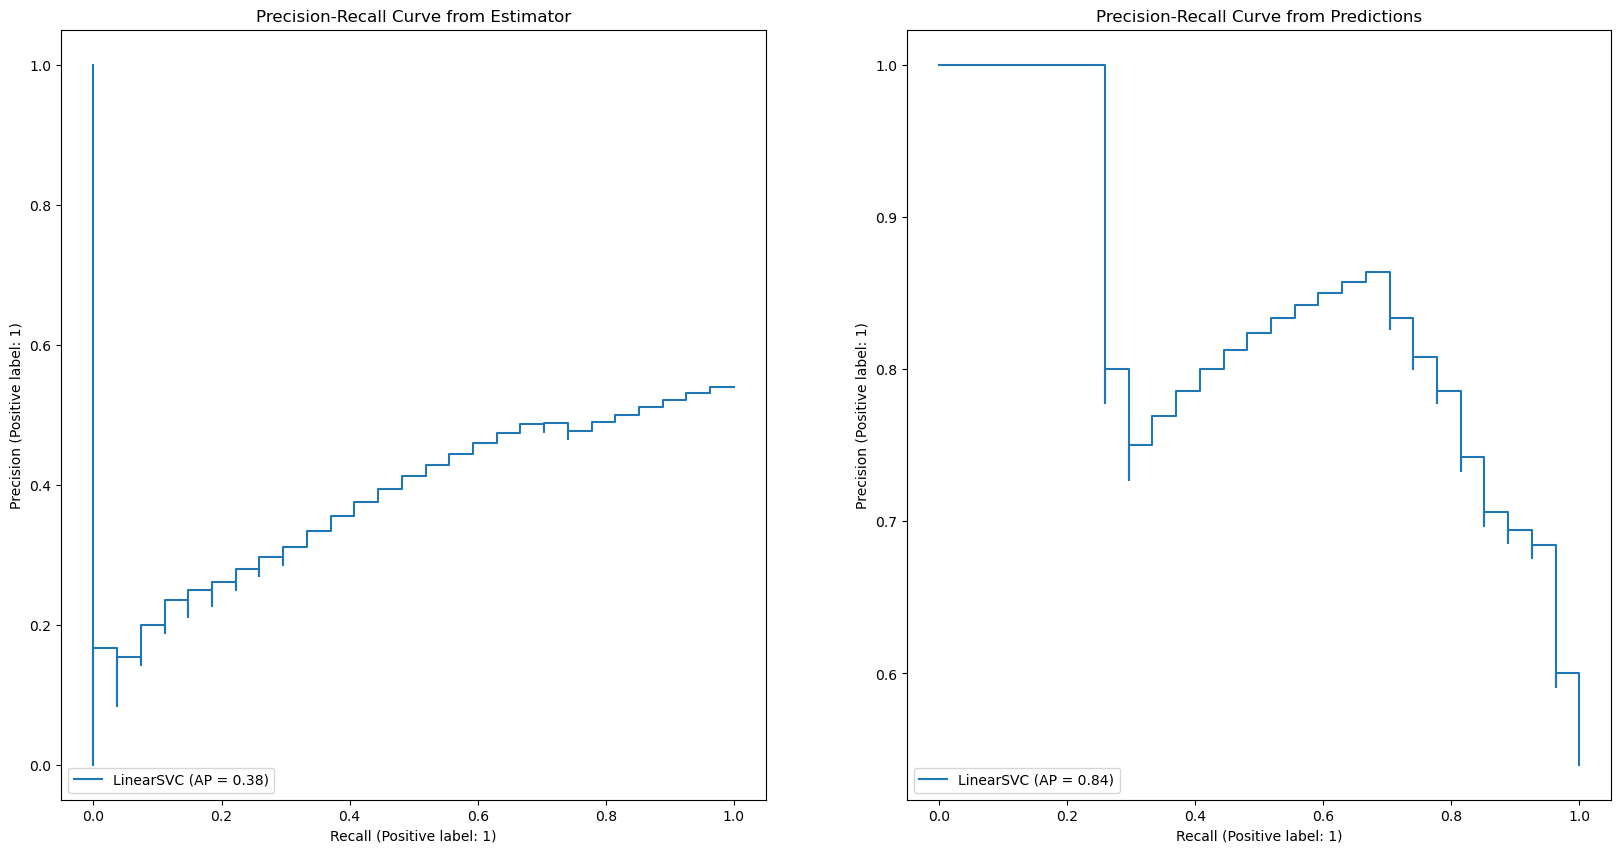

In [3]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import PrecisionRecallDisplay
%matplotlib inline

plt.rcParams['figure.figsize'] = [20, 10]

fig = plt.figure()
ax_11 = fig.add_subplot(1, 2, 1)
ax_12 = fig.add_subplot(1, 2, 2)

X, y = load_iris(return_X_y=True)

# 加雜訊
random_state = np.random.RandomState(87)
n_samples, n_features = X.shape
X = np.concatenate([X, random_state.randn(n_samples, 200 * n_features)], axis=1)

# 只用前兩類 跟 切分資料
X_train, X_test, y_train, y_test = train_test_split(X[y < 2], y[y < 2], test_size=0.5, random_state=random_state)


#classifier = LinearSVC(random_state=random_state).fit(X_train, y_train)
classifier = SVC(random_state=random_state, probability=True).fit(X_train, y_train)  # 改機率

# 如果用 from_estimator 要把模型也傳進去
display_estimator = PrecisionRecallDisplay.from_estimator(
    classifier, X_test, y_test, name="LinearSVC", ax=ax_11
)
display_estimator.ax_.set_title("Precision-Recall Curve from Estimator")

# 如果預測出結果可以用 from_predictions
y_score = classifier.decision_function(X_test)
y_score = list(map(max, classifier.predict_proba(X_test)))   # 改機率

display_predictions = PrecisionRecallDisplay.from_predictions(
    y_test, y_score, name="LinearSVC", ax=ax_12
    )
display_predictions.ax_.set_title("Precision-Recall Curve from Predictions")



# ROC （Receiver operating characteristic）

我們來看看 ROC 曲線的 x 軸 

## FPR （False Positive Rate） 偽陽性率

$$
FPR = \frac{FP}{FP+TN}
$$

我們來看看 ROC 曲線的 y 軸

## TPR （True Positive Rate） 真陽性率

$$
TPR = \frac{TP}{TP+FN}
$$

ROC 曲線越靠左上越好。

## AUC（Area Under Curve）

AUC 代表在 ROC 曲線下的面積

* $AUC=1$ 代表非常完美
* $0.5<AUC<1$ 代表模型有學到東西，可以去調整閾值
* $AUC=0.5$ 跟猜得一樣
* $AUC<0.5$ 比猜的還差


下面看實例


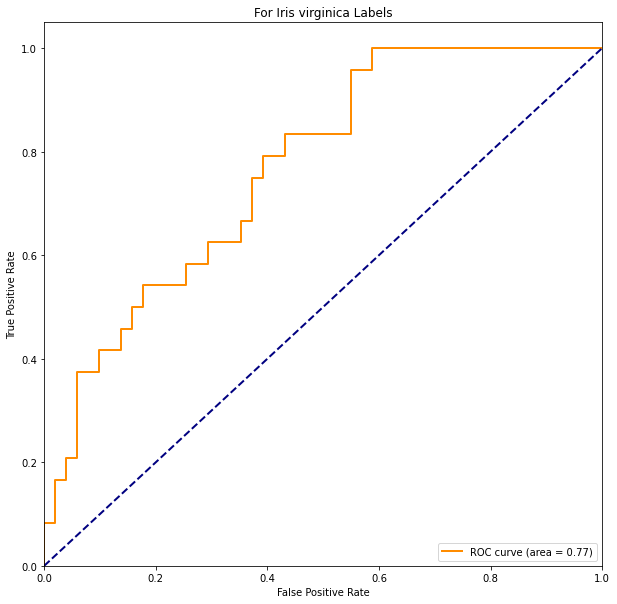

In [13]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn.svm import SVC
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
plt.rcParams['figure.figsize'] = [10, 10]

X, y = datasets.load_iris(return_X_y=True)

#  把數字轉 one hot
#  0 -> [1, 0, 0], 1 -> [0, 1, 0], 2 -> [0, 0, 1] 
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# 加入雜訊使問題變難
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# 切分資料
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=random_state)

# 使用 SVC 加上 多輸出
classifier = OneVsRestClassifier(
                SVC(kernel="linear", 
                probability=True, 
                random_state=random_state)
            )
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# 對於每一類計算 ROC curve 跟 ROC area
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 計算 micro-average ROC curve 跟 ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# setosa, versicolor, virginica
index = 2
name_list = ['setosa', 'versicolor', 'virginica']
plt.figure()
lw = 2
plt.plot(
    fpr[index],
    tpr[index],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[index],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("For Iris %s Labels" % name_list[index])
plt.legend(loc="lower right")
plt.show()




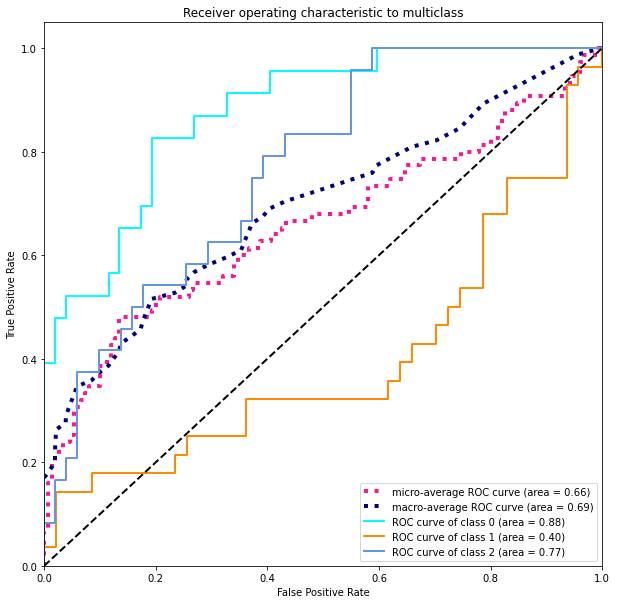

In [14]:
# 一次畫多筆資料
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# 每類算平均
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes

# 算 macro
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# 畫每一類
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

這邊多提一下， ROC Curve 會同等比重去考慮到 Positive 跟 Negative 的樣本，
而 Precision-Recall Curve 更專心在 Positive 的樣本。
我們可以觀察的出來，如果 Negative 的樣本數減少的話， 
PR Curve 會很敏感的產生變化，但是 ROC Curve 不會這麼敏感。
一般人的看法是，如果類別不平衡看 PR，均衡就看 ROC，我的建議是兩種都看，
你如果理解兩條曲線畫出來的原理，你就可以知道你的模型弱點在哪邊。


[參考](https://zhuanlan.zhihu.com/p/34655990)


目前 scikit learn 還不支援自己修改輸出的 threadhold ，
我們可以在看完 PR 跟 ROC Curve 以後，再自己寫函數去後製輸出。


In [4]:
print('result class: \n', classifier.predict(X_test)[:5])
print('result probability: \n', classifier.predict_proba(X_test)[:5])
print('result score: \n', classifier.decision_function(X_test)[:5])

# 自己寫輸出函數
function_thread = lambda output, thread=0.5: [1 if item>thread else 0 for item in output]
final_result = list(map(function_thread, classifier.predict_proba(X_test)))
print('my final result:')
final_result[:10]


result class: 
 [0 0 0 0 0]
result probability: 
 [[0.51618252 0.48381748]
 [0.53849772 0.46150228]
 [0.52121538 0.47878462]
 [0.55435791 0.44564209]
 [0.51994796 0.48005204]]
result score: 
 [-0.34368106 -0.1944128  -0.31009151 -0.08749931 -0.31855331]
my final result:


[[1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0]]